In [3]:
import os
import sys
import glob
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
fname = "data/BART_met.nc"

vars_to_keep = ['Tair','Qair','Rainf','Wind','PSurf','LWdown','SWdown','CO2air']
ds = xr.open_dataset(fname, decode_times=False)
freq = "0.5H"
units, reference_date = ds.time.attrs['units'].split('since')
df = ds[vars_to_keep].squeeze(dim=["x","y"], drop=True).to_dataframe()
start = reference_date.strip().split(" ")[0].replace("-","/")
df['dates'] = pd.date_range(start=start, periods=len(df), freq=freq)
df = df.set_index('dates')


In [3]:
for var in vars_to_keep:
    print("Checking NaN locations for variable ", var)
    for k,g in groupby(df[var].isnull().values):
        print((k, sum(1 for i in g))) 

Checking NaN locations for variable  Tair
(False, 245472)
Checking NaN locations for variable  Qair
(False, 245472)
Checking NaN locations for variable  Rainf
(False, 245472)
Checking NaN locations for variable  Wind
(False, 245472)
Checking NaN locations for variable  PSurf
(False, 245472)
Checking NaN locations for variable  LWdown
(False, 245472)
Checking NaN locations for variable  SWdown
(False, 245472)
Checking NaN locations for variable  CO2air
(False, 245472)


In [4]:
print(df[vars_to_keep[1]].isnull().values)

[False False False ... False False False]


In [14]:
swdown = df['SWdown'].values
print(swdown)

[155.48452684 155.48452684 155.48452684 ...   0.           0.
   0.        ]


In [6]:
print(np.sort(swdown))

[   0.            0.            0.         ... 1411.6        1429.30038462
 1467.2       ]


In [12]:
print(np.max(swdown))

1467.2


In [21]:
fname = "data/AMF_US-Kon_BASE-BADM_5-5/AMF_US-Kon_BASE_HH_5-5_mod.csv"
df = pd.read_csv(fname,comment='#',na_values=-9999)

df = df.rename(columns={'TIMESTAMP_START':'dates',
                        'TA_PI_F_1_1_1':'tair',
                        'TA_1_1_1':'tair_raw',    
                        'RH_PI_F_1_1_1':'rh',
                        'SW_IN_1_1_1':'swdown',
                        'WS_1_1_1':'wind',
                        'P_1_1_1':'rainf',
                        'VPD_PI_1_1_1':'vpd',
                        'CO2_1_1_1':'co2'})

df['dates'] = df['dates'].astype(str)
new_dates = []
for i in range(len(df)):
    year = df['dates'][i][0:4]
    month = df['dates'][i][4:6]
    day = df['dates'][i][6:8]
    hour = df['dates'][i][8:10]
    minute = df['dates'][i][10:12]
    if day.startswith("0"):
        day = day[1:]
    if hour.startswith("0"):
        hour = hour[1:]
    date = "%s/%s/%s %s:%s" % (year, month, day, hour, minute)
    new_dates.append(date)

df['dates'] = new_dates
df = df.set_index('dates')
df.index = pd.to_datetime(df.index)

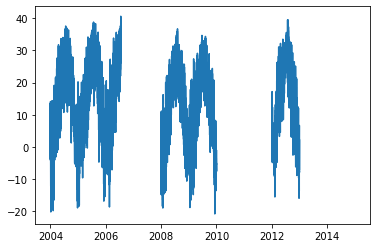

In [22]:
plt.plot(df.tair)

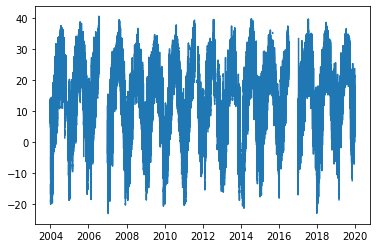

In [24]:
plt.plot(df.tair_raw)

In [25]:
df.tair = np.fmax(df.tair,df.tair_raw)

In [15]:
max(df.tair)

40.6191

In [16]:
min(df.tair)

-20.66361506

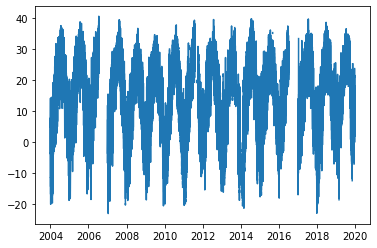

In [26]:
plt.plot(df.tair)

In [2]:
import sys
import os
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt

In [3]:
forecast_date = "2020-12-13"
siteID_list = ["BART","KONZ","OSBS","SRER"]
#fname_list = os.listdir()

In [5]:
print(siteID_list)

['BART', 'KONZ', 'OSBS', 'SRER']


In [10]:
fname_list=os.listdir("data/forecastcsv/"+forecast_date+"/"+siteID_list[0])

In [11]:
fname = fname_list[0]

In [12]:
print(fname)

CABLEInput_BART_2020-12-13_2021-01-17_ens25.csv


In [15]:
fname[-6:-4]

'25'

In [24]:
siteID = "SRER"
lat = 44.0639*(siteID=="BART")+31.91068*(siteID=="KONZ")+39.10077*(siteID=="OSBS")+31.91068*(siteID=="SRER")
lon = -71.2874*(siteID=="BART")-81.99343*(siteID=="KONZ")-96.56309*(siteID=="OSBS")-110.83549*(siteID=="SRER")

print(lat,lon)

31.91068 -110.83549


In [18]:
siteID="BART"
siteID=="BART"

True

In [19]:
44.0639*(siteID=="BART")

44.0639

In [27]:
forecast_date = "2020-12-13"
siteID = "BART"


lat = 44.0639*(siteID=="BART")+31.91068*(siteID=="KONZ")+39.10077*(siteID=="OSBS")+31.91068*(siteID=="SRER")
lon = -71.2874*(siteID=="BART")+-81.99343*(siteID=="KONZ")+-96.56309*(siteID=="OSBS")+-110.83549*(siteID=="SRER")
fname_list = os.listdir("data/forecastcsv/"+forecast_date+"/"+siteID)
fname = fname_list[0]
inputcsv = "data/forecastcsv/"+forecast_date+"/"+siteID+"/"+fname
print(inputcsv)
df = pd.read_csv(inputcsv,comment='#',na_values=-9999)

df = df.rename(columns={'time':'dates',
                        'Tair':'tair',
                        'SWdown':'swdown',
                        'Wind':'wind',
                        'Rainf':'rainf',
                        'Psurf':'psurf',
                        'LWdown':'lwdown',
                        'Qair':'qair'})

# Clean up the dates
df['dates'] = df['dates'].astype(str)
new_dates = []
for i in range(len(df)):
    year = df['dates'][i][0:4]
    month = df['dates'][i][4:6]
    day = df['dates'][i][6:8]
    hour = df['dates'][i][8:10]
    minute = df['dates'][i][10:12]
    if day.startswith("0"):
        day = day[1:]
    if hour.startswith("0"):
        hour = hour[1:]
    date = "%s/%s/%s %s:%s" % (year, month, day, hour, minute)
    new_dates.append(date)

df['dates'] = new_dates
df = df.set_index('dates')
df.index = pd.to_datetime(df.index)

# Add CO2
df['co2'] = 400

data/forecastcsv/2020-12-13/BART/CABLEInput_BART_2020-12-13_2021-01-17_ens25.csv


In [28]:
df

,tair,PSurf,rainf,qair,lwdown,swdown,wind,co2
dates,,,,,,,,
2020-12-13 00:00:00,272.116089,95524.742188,0.000074,0.003563,318.000000,0.000000,3.346879,400
2020-12-13 01:00:00,272.494232,95395.867188,0.000074,0.003677,318.000000,0.000000,3.139083,400
2020-12-13 02:00:00,272.900635,95285.039062,0.000074,0.003810,318.000000,0.000000,2.913510,400
2020-12-13 03:00:00,273.327362,95190.882812,0.000074,0.003957,318.000000,0.000000,2.676824,400
2020-12-13 04:00:00,273.766663,95112.015625,0.000074,0.004115,318.000000,0.000000,2.435687,400
...,...,...,...,...,...,...,...,...
2021-01-16 20:00:00,268.445190,96194.132812,0.000000,0.001338,178.169708,175.737915,1.233682,400
2021-01-16 21:00:00,268.104858,96205.382812,0.000000,0.001382,178.169708,0.000000,1.389222,400
2021-01-16 22:00:00,267.105316,96225.976562,0.000000,0.001428,178.169708,0.000000,1.590060,400
